## Import libraries

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import nbformat
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

## Explore the dataset

In [7]:
file_path = "loan.csv"
df = pd.read_csv(file_path)

In [8]:
df.head(3)

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied


In [9]:
df.shape

(61, 8)

## Checkout for null values/duplicates

In [10]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

## Data Visualization

In [12]:
df2= df['loan_status'].value_counts().reset_index()
df2

,loan_status,count
0,Approved,45
1,Denied,16


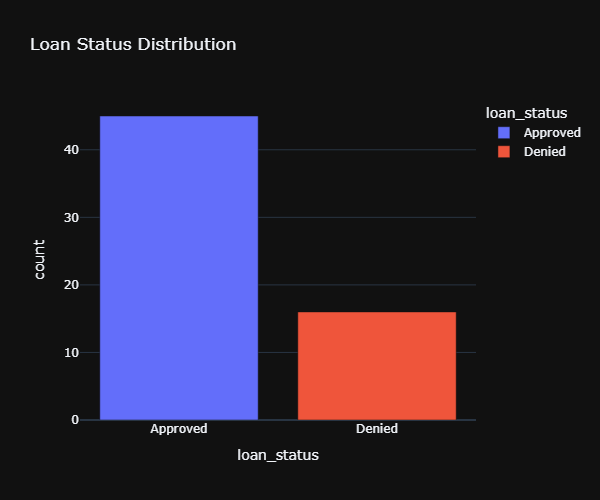

In [13]:
fig = px.bar(df2, x='loan_status', y='count', template='plotly_dark', title='Loan Status Distribution', width=600, color='loan_status')
fig.show(renderer='png')

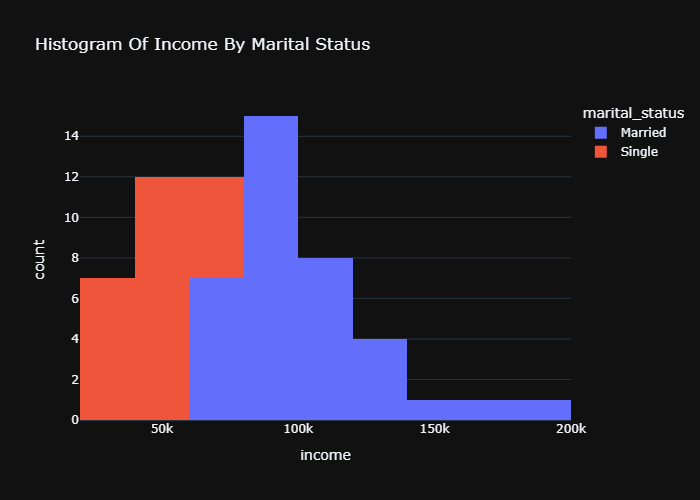

In [14]:
fig = px.histogram(df, x='income', nbins=15, color='marital_status', template='plotly_dark',  title='Histogram Of Income By Marital Status')
fig.show(renderer='png')

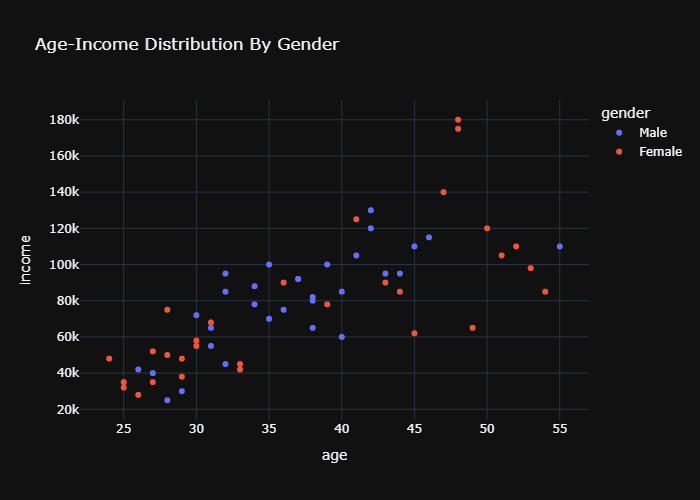

In [15]:
fig = px.scatter(df, x='age', y='income', color='gender', template='plotly_dark', title='Age-Income Distribution By Gender')
fig.show(renderer='png')


In [16]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

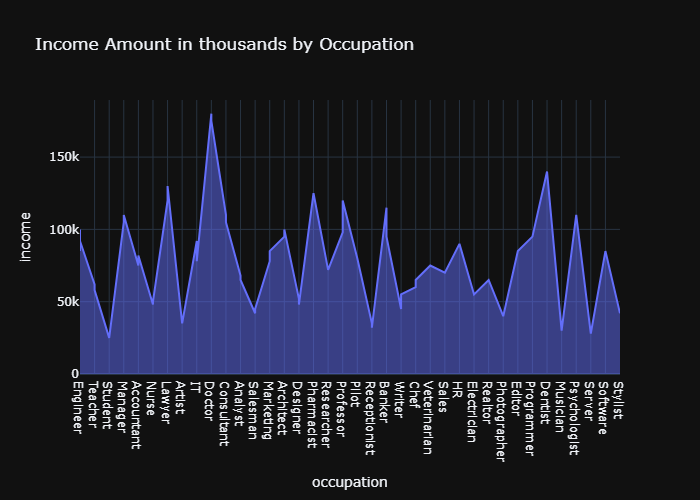

In [17]:
fig = px.area(df, x='occupation', y='income', template='plotly_dark', title='Income Amount in thousands by Occupation')
fig.show(renderer='png')

In [18]:
df2 = df['education_level'].value_counts().reset_index()
df2.head(3)

,education_level,count
0,Bachelor's,23
1,Master's,15
2,Doctoral,10


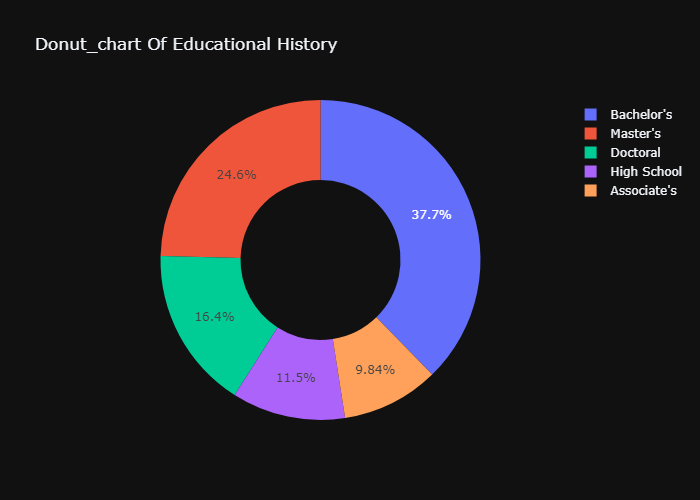

In [19]:
fig = px.pie(df2, names='education_level', values='count', template='plotly_dark', title='Donut_chart Of Educational History', hole=0.5)
fig.show(renderer='png')

In [20]:
df2 = df.groupby(['gender', 'marital_status'])['income'].mean().reset_index()
df2.head(3)

,gender,marital_status,income
0,Female,Married,110428.571429
1,Female,Single,48187.500000
2,Male,Married,92478.260870


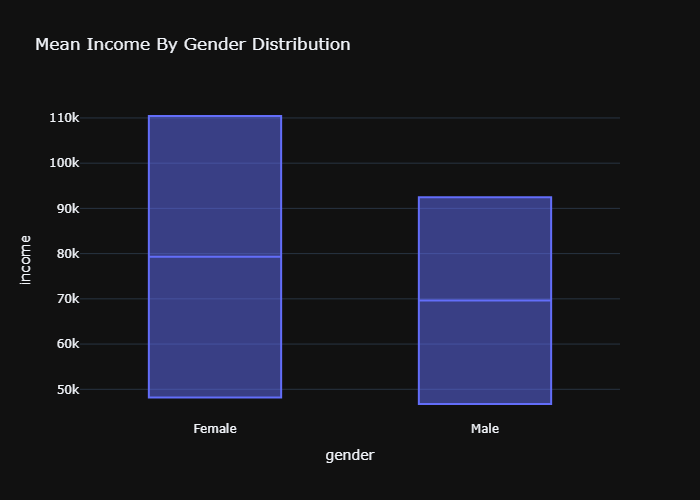

In [21]:
fig = px.box(df2, x='gender', y='income', template='plotly_dark', title='Mean Income By Gender Distribution')
fig.show(renderer='png')

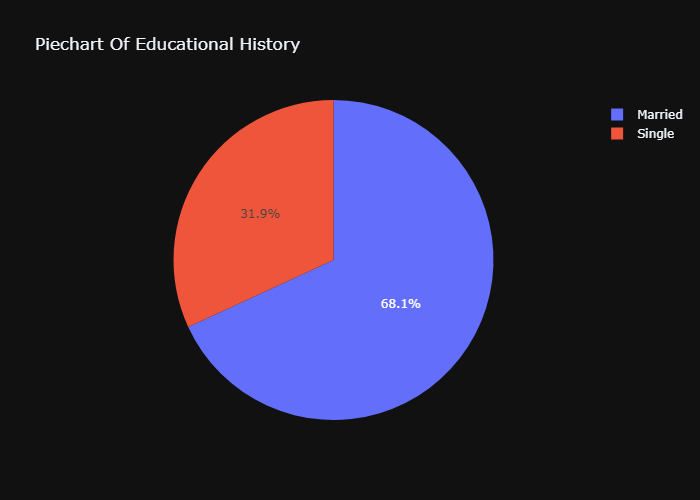

In [22]:
fig = px.pie(df2, names='marital_status', values='income', template='plotly_dark', title='Piechart Of Educational History')
fig.show(renderer='png')

In [23]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

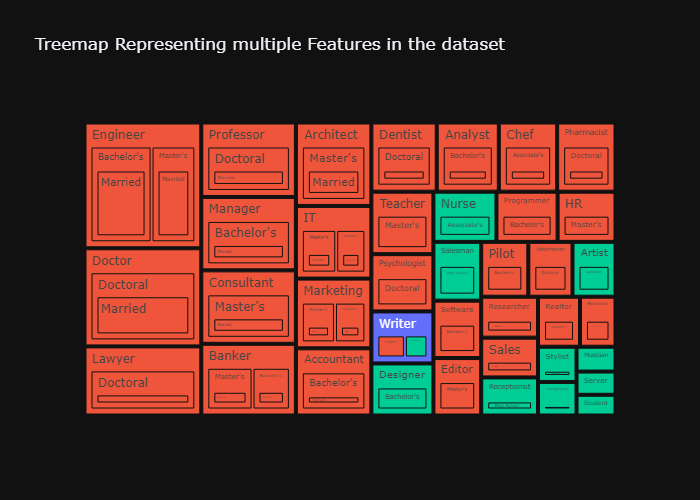

In [24]:
fig = px.treemap(df, path=['occupation', 'education_level', 'marital_status'], values='income', color='loan_status', hover_data=['age'], template='plotly_dark', title='Treemap Representing multiple Features in the dataset')
fig.show(renderer='png')

#### NB: I made use of the parameter(renderer='png'), to enable my charts display on github coz github does not surport interactive chart like plotly...to make the chart interactive you can delete the parameter "renderer"


### Drop redundant column

In [25]:
df = df.drop(['gender', 'occupation', 'education_level'], axis=1)

### Convert categorical features to numeric

In [26]:
df.head(3)

,age,marital_status,income,credit_score,loan_status
0,32,Married,85000,720,Approved
1,45,Single,62000,680,Approved
2,28,Single,25000,590,Denied


In [27]:
categorical_df = df.select_dtypes('object')
categorical_df.head()

,marital_status,loan_status
0,Married,Approved
1,Single,Approved
2,Single,Denied
3,Married,Approved
4,Married,Approved


In [28]:
df['marital_status'] = df['marital_status'].map({'Single':0, 'Married':1})
df['loan_status'] = df['loan_status'].map({'Denied':0, 'Approved':1})

In [29]:
df.head(3)

,age,marital_status,income,credit_score,loan_status
0,32,1,85000,720,1
1,45,0,62000,680,1
2,28,0,25000,590,0


In [30]:
df.describe()

,age,marital_status,income,credit_score,loan_status
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,37.081967,0.606557,78983.606557,709.836066,0.737705
std,8.424755,0.492568,33772.025802,72.674888,0.443533
min,24.000000,0.000000,25000.000000,560.000000,0.000000
25%,30.000000,0.000000,52000.000000,650.000000,0.000000
50%,36.000000,1.000000,78000.000000,720.000000,1.000000
75%,43.000000,1.000000,98000.000000,770.000000,1.000000
max,55.000000,1.000000,180000.000000,830.000000,1.000000


## Split the dataset into input(X) and output(y) 

In [31]:
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

### Feature scaling

In [37]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
X = scalar.fit_transform(X)

### lets save the scalar 

In [41]:
import joblib as joblib
from joblib import dump
joblib.dump('scalar', 'scalar.job')
print("✅ Scalar saved successfully!")

✅ Scalar saved successfully!


### Split the input_set into training and testing set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(48, 4)

### Model the data with sequential feed forward neural network

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(128, input_shape=(4,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

### Print the model summary

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [44]:
loss = keras.losses.BinaryCrossentropy()
optim = keras.optimizers.Adam(learning_rate=0.1)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metrics)

### Fit the model for training

In [45]:
model.fit(X_train, y_train, batch_size=32, verbose=1, epochs=20, validation_split=0.1)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - accuracy: 0.6061 - loss: 0.7111 - val_accuracy: 0.8000 - val_loss: 0.3819
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7357 - loss: 1.4019 - val_accuracy: 0.8000 - val_loss: 0.9883
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5698 - loss: 2.1278 - val_accuracy: 0.8000 - val_loss: 0.1731
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8186 - loss: 1.1233 - val_accuracy: 0.8000 - val_loss: 0.4149
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9482 - loss: 0.1880 - val_accuracy: 0.8000 - val_loss: 0.4782
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9327 - loss: 0.1053 - val_accuracy: 0.8000 - val_loss: 0.5171
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9741 - loss: 0.1215 - val_accuracy: 0.8000 - val_loss: 0.3272
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8808 - loss: 0.3713 - val_accuracy: 1.0000 - val_loss: 0.1391

In [46]:
model.evaluate(X_test, y_test, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8462 - loss: 0.2279


[0.2279384732246399, 0.8461538553237915]

### Save/load the trained model

In [47]:
model.save('Loan_hub.keras')

In [48]:
model = keras.models.load_model('Loan_hub.keras')

### predict the trained model

In [49]:
input = np.array([[25, 0, 15000, 429]])
input = scalar.transform(input)
prediction = model.predict(input)

threshold = 0.5
if prediction <= threshold:
    print('Loan Denied')
else:
    print('Loan Approved')    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Loan Denied
